<a href="https://colab.research.google.com/github/Dreamer97JB/Abstracts_Classification_IA/blob/fix_berta_cualitativos/Christian_Escobar_Abstract_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fase 1  - Preparación del Dataset

## Montar el Dataset desde GoogleDrive

Montar Repositorio de Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Cargar el Archivo desde la raíz de Google Drive

In [ ]:
import pandas as pd
# Aquí cambias la ruta para que apunte a la carpeta donde tengas tu archivo
file_path = '/content/drive/MyDrive/googleScholarPeriodAbs.xlsx'

df = pd.read_excel(file_path)

df.head()  # Ver las primeras filas


Column1                                              Title  \
0        0  Scientific writing as a social act: A review o...   
1        1  Benefits, motivations, and challenges of inter...   
2        2  Organisation matters: towards an organisationa...   
3        3  Science education in the era of a pandemic: Ho...   
4        4  On methods, ontologies, and representation in ...   

                Authors  Citations_counts  \
0            C Bazerman               213   
1  J Dusdal, JJW Powell               177   
2              S Rödder                46   
3             S Erduran               159   
4           JH Fujimura               160   

                                                sumj  Year  \
0  C Bazerman - New essays in technical and scien...  2019   
1  J Dusdal, JJW Powell - Science and Public Poli...  2021   
2  S Rödder - Journal of Communication Management...  2020   
3   S Erduran - Science & Education, 2020 - Springer  2020   
4  JH Fujimura - Social organization and social p...  2024   

                                    Journal  \
0  New essays in technical and scientific …   
1                 Science and Public Policy   
2       Journal of Communication Management   
3                       Science & Education   
4    Social organization and social process   

                                            Abstract     period  IsEnglish  \
0  This chapter reviews the literature in the soc...  2024-2019       True   
1  Contemporary science is marked by expanding an...  2024-2019       True   
2  This paper looks at science communication thro...  2024-2019       True   
3  In late February 2019, when the Covid-19 crisi...  2024-2019       True   
4  We are weak today in ideal matters because int...  2024-2019       True   

   SearchCriteria  
0  search1period1  
1  search1period1  
2  search1period1  
3  search1period1  
4  search1period1

## Limpieza de Datos

In [ ]:
# Lista de columnas que no conservaremos ya que no aportan al análisis
columns_to_drop = [
    'Column1',
    'IsEnglish',
    'SearchCriteria',
    'period',
    'sumj'
]

# Creamos un nuevo DataFrame sin esas columnas
df_clean = df.drop(columns=columns_to_drop, axis=1)

# Verificamos las columnas resultantes
print(df_clean.columns)

Index(['Title', 'Authors', 'Citations_counts', 'Year', 'Journal', 'Abstract'], dtype='object')


Verificación de Datos Nulos

In [ ]:
# Ver cuántos valores nulos hay en cada columna
df_clean.isnull().sum()

Title                  0
Authors              625
Citations_counts       0
Year                   0
Journal             2120
Abstract             293
dtype: int64

In [ ]:
import pandas as pd

# 1. Rellenar Journal y Authors con etiqueta genérica
df_clean = df_clean.fillna({
    'Journal': 'NoJournal',
    'Authors': 'NoAuthors'
})

# 2. Eliminar filas que no tengan Abstract (4.3% de datos)
df_clean.dropna(subset=['Abstract'], inplace=True)

# 3. Verificar cuántos nulos quedan
print("Nulos después del tratamiento:\n", df_clean.isnull().sum())

Nulos después del tratamiento:
 Title               0
Authors             0
Citations_counts    0
Year                0
Journal             0
Abstract            0
dtype: int64


Revisión de Duplicidad de Datos

In [ ]:
# Verificar si existen datos Duplicados
df_clean.duplicated().sum()

285

Relizamos un análisis para revisar los datos duplicados

In [ ]:
duplicates = df_clean[df_clean.duplicated(keep=False)]
duplicates

Title  \
0     Scientific writing as a social act: A review o...   
4     On methods, ontologies, and representation in ...   
7     Recoding liberalism: philosophy and sociology ...   
11                        Science Studies and Sociology   
12    The sociology of science and social constructi...   
...                                                 ...   
6526  Science, truth and history, part II. Metaphysi...   
6533  The politics of display: Museums, science, cul...   
6631  Ways of knowing and doing STS: Niki Vermeulen ...   
6664  CHAPTER THREE SOCIO-TECHNICAL CONTROVERSIES, D...   
6703                Cognition and communication at work   

                       Authors  Citations_counts  Year  \
0                   C Bazerman               213  2019   
4                  JH Fujimura               160  2024   
7                  M Beddeleem                34  2020   
11                   NoAuthors                 1  2022   
12                    ME Lynch                 9  2019   
...                        ...               ...   ...   
6526                    N Tosh                19  2007   
6533               S Macdonald               788  1998   
6631                 NoAuthors                 0  2018   
6664                  P GARCÍA                 0  2014   
6703  Y Engeström, D Middleton              1073  1996   

                                                Journal  \
0              New essays in technical and scientific …   
4                Social organization and social process   
7                           Nine lives of neoliberalism   
11                                            NoJournal   
12        The Routledge handbook of social epistemology   
...                                                 ...   
6526  Studies in History and Philosophy of Science P...   
6533                                          NoJournal   
6631                                          NoJournal   
6664     DÍAZ - Varieties of Liberalism: Contemporary …   
6703                                          NoJournal   

                                               Abstract  
0     This chapter reviews the literature in the soc...  
4     We are weak today in ideal matters because int...  
7     In the wake of the global financial crisis, th...  
11    … In historians of science, however, the socio...  
12    Constructivism is a theoretical position that ...  
...                                                 ...  
6526  Historians of science have frequently sought t...  
6533  The Politics of Display: Museums, science, cul...  
6631  It is a special moment in the history of STS. ...  
6664  Claims for more public and expert participatio...  
6703  Cognition and communication at work Cognition ...  

[557 rows x 6 columns]

Procedemos a eliminar los datos duplicados y ajustamos los tipos de datos para cada columna

In [ ]:
import pandas as pd

# 1. Crear un DataFrame sin duplicados
df_no_duplicates = df_clean.drop_duplicates()

# 2. Crear una copia explícita para evitar problemas de vistas
df_no_duplicates = df_no_duplicates.copy()

# 3. Ajustar los tipos de datos
# 3.1. Convertir 'Title' a texto (string)
df_no_duplicates.loc[:, 'Title'] = df_no_duplicates['Title'].astype(str)

# 3.2. Convertir 'Authors' a texto (string)
df_no_duplicates.loc[:, 'Authors'] = df_no_duplicates['Authors'].astype(str)

# 3.3. Convertir 'Citations_counts' a numérico (int, manejando valores no convertibles)
df_no_duplicates.loc[:, 'Citations_counts'] = pd.to_numeric(df_no_duplicates['Citations_counts'], errors='coerce').fillna(0).astype(int)

# 3.4. Convertir 'Year' a numérico (int, manejando errores de conversión)
df_no_duplicates.loc[:, 'Year'] = pd.to_numeric(df_no_duplicates['Year'], errors='coerce').fillna(0).astype(int)

# 3.5. Convertir 'Journal' a texto (string)
df_no_duplicates.loc[:, 'Journal'] = df_no_duplicates['Journal'].astype(str)

# 3.6. Convertir 'Abstract' a texto (string)
df_no_duplicates.loc[:, 'Abstract'] = df_no_duplicates['Abstract'].astype(str)

# 4. Ver cuántas filas quedaron después de eliminar duplicados
print("Filas antes:", df_clean.shape[0])
print("Filas después:", df_no_duplicates.shape[0])

# 5. Guardar en un CSV
df_no_duplicates.to_csv('data_clean_no_duplicates.csv', index=False)

# 6. Confirmar los tipos de datos después de la conversión
print(df_no_duplicates.info())

# 7. Revisar el resultado
df_no_duplicates.head()


Filas antes: 6769
Filas después: 6483
<class 'pandas.core.frame.DataFrame'>
Index: 6483 entries, 0 to 6768
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Title             6483 non-null   object
 1   Authors           6483 non-null   object
 2   Citations_counts  6483 non-null   int64 
 3   Year              6483 non-null   int64 
 4   Journal           6483 non-null   object
 5   Abstract          6483 non-null   object
dtypes: int64(2), object(4)
memory usage: 354.5+ KB
None


Title               Authors  \
0  Scientific writing as a social act: A review o...            C Bazerman   
1  Benefits, motivations, and challenges of inter...  J Dusdal, JJW Powell   
2  Organisation matters: towards an organisationa...              S Rödder   
3  Science education in the era of a pandemic: Ho...             S Erduran   
4  On methods, ontologies, and representation in ...           JH Fujimura   

   Citations_counts  Year                                   Journal  \
0               213  2019  New essays in technical and scientific …   
1               177  2021                 Science and Public Policy   
2                46  2020       Journal of Communication Management   
3               159  2020                       Science & Education   
4               160  2024    Social organization and social process   

                                            Abstract  
0  This chapter reviews the literature in the soc...  
1  Contemporary science is marked by expanding an...  
2  This paper looks at science communication thro...  
3  In late February 2019, when the Covid-19 crisi...  
4  We are weak today in ideal matters because int...

Dado que se ha dado la especificidad de que los textos deben ser clasificados en las categorías: ["Realista", "Constructivista", "Relativista", "Pragmatista"] deberemos hacer un proceso adicional de limpieza para preparar los datos de tal manera que mediante un modelo pre-entrenado podamos clasficar los textos haciendo uso de la coherencia semántica.


## Preprocesar el DataFrame

Se procese a limpiar espacios remover caracteres especiales, textos que sean inferiores a 20 caracters si los hubiese.

In [ ]:
#  Paso 2: Importar librerías
import pandas as pd
import re

#  Paso 3: Asegurar que la columna 'Abstract' en df_no_duplicates sea texto
df_no_duplicates['Abstract'] = df_no_duplicates['Abstract'].astype(str)

#  Paso 4: Función para limpiar los abstracts
def clean_text(text):
    text = text.lower()  # Convertir a minúsculas
    text = re.sub(r'\s+', ' ', text)  # Remover espacios extra
    text = re.sub(r'[^\w\s]', '', text)  # Remover caracteres especiales
    return text.strip()

# Aplicar limpieza a la columna 'Abstract'
df_no_duplicates['Abstract'] = df_no_duplicates['Abstract'].apply(clean_text)

#  Paso 5: Eliminar abstracts demasiado cortos (< 20 caracteres)
df_no_duplicates = df_no_duplicates[df_no_duplicates['Abstract'].str.len() > 20]

#  Paso 6: Mostrar las primeras filas para verificar el preprocesamiento
print("Primeras filas del dataset preprocesado:")
print(df_no_duplicates.head())


Primeras filas del dataset preprocesado:
                                               Title               Authors  \
0  Scientific writing as a social act: A review o...            C Bazerman   
1  Benefits, motivations, and challenges of inter...  J Dusdal, JJW Powell   
2  Organisation matters: towards an organisationa...              S Rödder   
3  Science education in the era of a pandemic: Ho...             S Erduran   
4  On methods, ontologies, and representation in ...           JH Fujimura   

   Citations_counts  Year                                   Journal  \
0               213  2019  New essays in technical and scientific …   
1               177  2021                 Science and Public Policy   
2                46  2020       Journal of Communication Management   
3               159  2020                       Science & Education   
4               160  2024    Social organization and social process   

                                            Abstract  
0  this 

## Clasificación de los artículos

Dado que no tenemos etiquetas previas para nuestros abstracts, usaremos **Zero-Shot Learning**, una técnica que permite clasificar texto sin necesidad de entrenamiento.

**¿Cómo funciona?** Utilizaremos un modelo preentrenado de **Hugging Face**, facebook/bart-large-mnli, que está diseñado para comprender el significado de un texto y asignarle una categoría entre un conjunto predefinido.

 Definiremos nuestras **categorías filosóficas**:

*   **Realista**
    
*   **Constructivista**
    
*   **Relativista**
    
*   **Pragmatista**
    

 Cada abstract será procesado y el modelo asignará la **categoría más probable**.

In [ ]:
!pip install datasets

import torch
from transformers import pipeline
from datasets import Dataset
from google.colab import drive


# Paso 1: Definir las categorías de clasificación
labels = ["Realista", "Constructivista", "Relativista", "Pragmatista"]

#  Paso 2: Cargar el modelo Zero-Shot optimizado para GPU
device = 0 if torch.cuda.is_available() else -1  # Usa GPU si está disponible
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli", device=device)

#  Paso 3: Convertir el DataFrame en un Dataset de Hugging Face para procesamiento en lotes
dataset = Dataset.from_pandas(df_no_duplicates)

#  Paso 4: Función de clasificación optimizada para GPU
def classify_batch(batch):
    results = classifier(batch["Abstract"], labels)
    batch["Classification"] = [r["labels"][0] for r in results]  # Tomar la mejor categoría
    return batch

# Paso 5: Aplicar clasificación en lotes
dataset = dataset.map(classify_batch, batched=True, batch_size=16)  # Procesamos en lotes de 16

# Paso 6:Convertir de nuevo a DataFrame
df_no_duplicates = dataset.to_pandas()

# Paso 7: Guardar los resultados en Google Drive
output_path = "/content/drive/My Drive/classified_abstracts.csv"
df_no_duplicates.to_csv(output_path, index=False)

print(f"✅ Proceso finalizado. Archivo guardado en: {output_path}")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 19.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 w

Device set to use cuda:0


Map:   0%|          | 0/6186 [00:00<?, ? examples/s]

✅ Proceso finalizado. Archivo guardado en: /content/drive/My Drive/classified_abstracts.csv


## Fase de Análisis

### Estadística Descripptiva

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ruta del archivo en Google Drive
file_path = "/content/drive/My Drive/classified_abstracts.csv"

# Cargar el dataset clasificado
df_classified = pd.read_csv(file_path)

# Estadísticas Descriptivas
category_counts = df_classified["Classification"].value_counts()
yearly_counts = df_classified.groupby("Year")["Title"].count()
citations_per_category = df_classified.groupby("Classification")["Citations_counts"].mean().reset_index()

# Configuración de estilo
sns.set_theme(style="whitegrid")

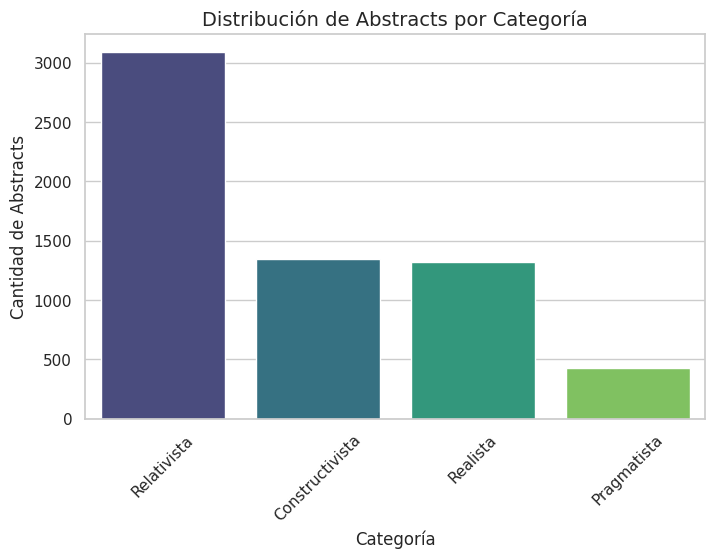

In [ ]:
# 📊 Gráfico 1: Distribución de Categorías
plt.figure(figsize=(8, 5))
sns.barplot(x=category_counts.index, y=category_counts.values, hue=category_counts.index, legend=False, palette="viridis")
plt.title("Distribución de Abstracts por Categoría", fontsize=14)
plt.xlabel("Categoría", fontsize=12)
plt.ylabel("Cantidad de Abstracts", fontsize=12)
plt.xticks(rotation=45)
plt.show()

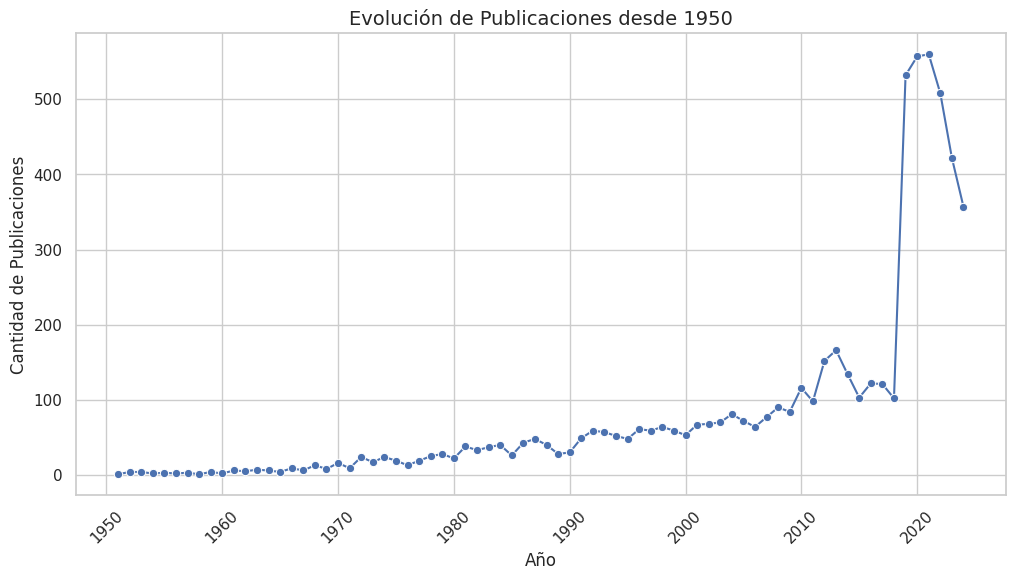

In [ ]:
# 📅 Gráfico 2: Evolución de Publicaciones por Año
yearly_counts = df_classified.groupby("Year")["Title"].count()
yearly_counts_filtered = yearly_counts[yearly_counts.index >= 1950]

plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_counts_filtered.index, y=yearly_counts_filtered.values, marker="o", linestyle="-", color="b")
plt.title("Evolución de Publicaciones desde 1950", fontsize=14)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Cantidad de Publicaciones", fontsize=12)
plt.xticks(rotation=45)  # Girar etiquetas del eje x para mejor lectura
plt.grid(True)
plt.show()

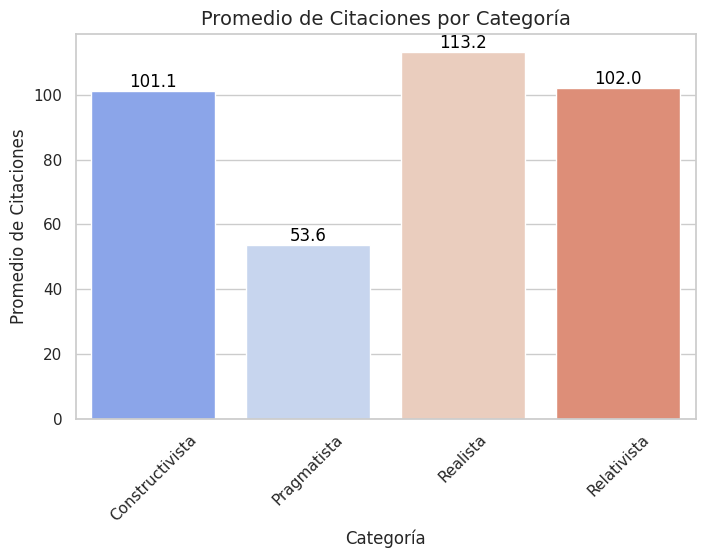

In [ ]:
# 📊 Gráfico 3: Promedio de Citaciones por Categoría

plt.figure(figsize=(8, 5))

ax = sns.barplot(
    data=citations_per_category.reset_index(),
    x="Classification",
    y="Citations_counts",
    hue="Classification",
    dodge=False,
    legend=False,
    palette="coolwarm"
)


for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black')

plt.title("Promedio de Citaciones por Categoría", fontsize=14)
plt.xlabel("Categoría", fontsize=12)
plt.ylabel("Promedio de Citaciones", fontsize=12)
plt.xticks(rotation=45)
plt.show()


### Clustering

Se desarrolla este clustering conforme a las 4 macro categorías que tenemos (Constructivismo, Pragmatismo, Realismo y Relativismo) dentro de estos es impotante identificar los subtemas existentes dentro de cada corriente filosófica.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



🔹 Procesando clustering dentro de la categoría: Constructivista


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


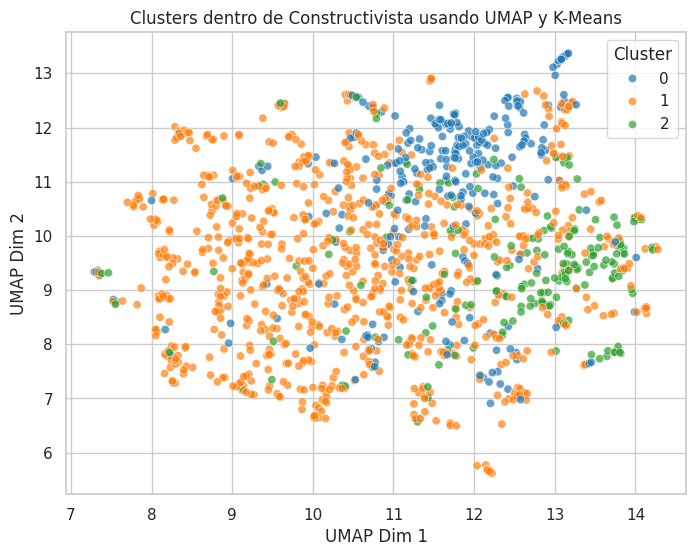


🔹 Procesando clustering dentro de la categoría: Pragmatista


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


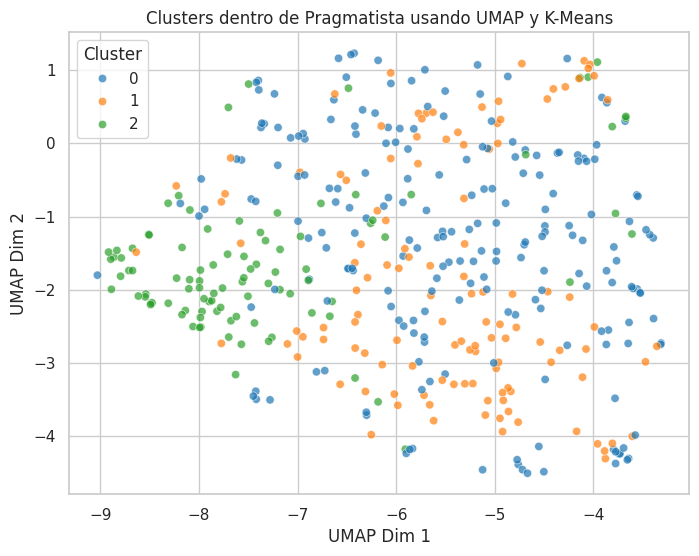


🔹 Procesando clustering dentro de la categoría: Realista


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


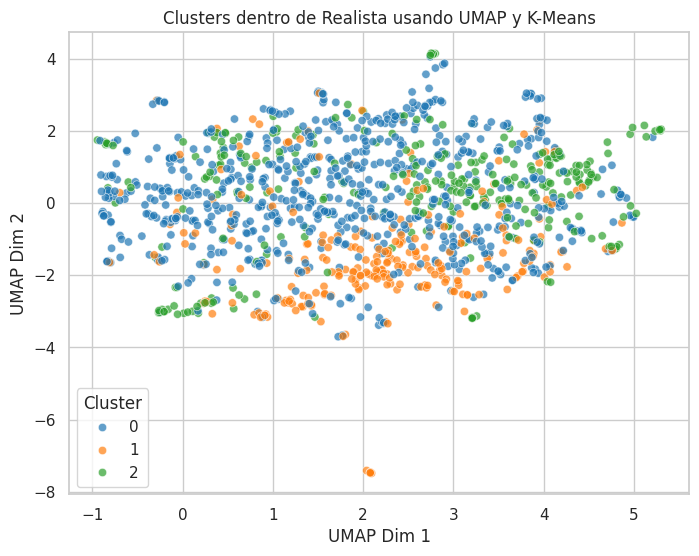


🔹 Procesando clustering dentro de la categoría: Relativista


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


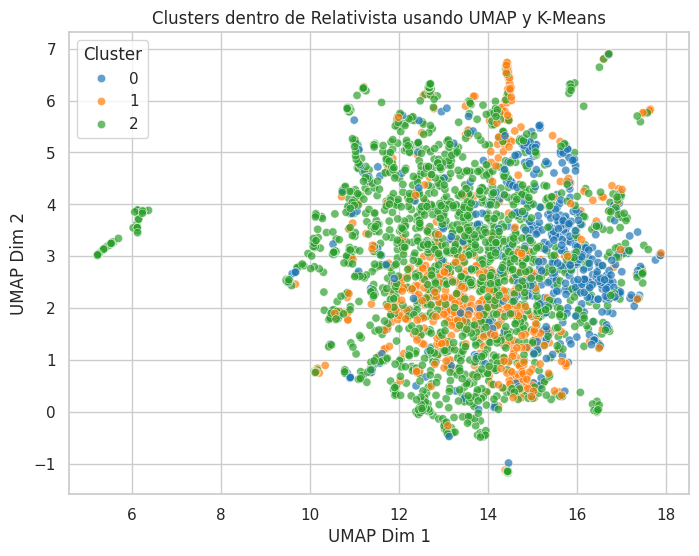


✅ Clustering interno por categoría completado. Archivo guardado en: /content/drive/My Drive/classified_abstracts_with_internal_clusters.csv


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import string
import nltk
from nltk.corpus import stopwords
import umap

# Descargar stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# 📌 Asegurar preprocesamiento de texto
def preprocess_text(text):
    text = str(text).lower()  # Convertir a minúsculas
    text = "".join([char for char in text if char not in string.punctuation])  # Eliminar puntuación
    words = text.split()  # Tokenizar
    words = [word for word in words if word not in stop_words]  # Eliminar stopwords
    return " ".join(words)

df_classified["cleaned_abstract"] = df_classified["Abstract"].apply(preprocess_text)

# 📌 Crear subconjuntos del dataset basado en cada categoría
categories = ["Constructivista", "Pragmatista", "Realista", "Relativista"]
cluster_results = {}

for category in categories:
    print(f"\n🔹 Procesando clustering dentro de la categoría: {category}")

    # Filtrar solo los abstracts de la categoría actual
    df_subset = df_classified[df_classified["Classification"] == category].copy()

    if df_subset.shape[0] < 5:
        print(f"⚠️ Pocos abstracts en {category}, omitiendo clustering.")
        continue

    # Vectorizar los abstracts con TF-IDF
    vectorizer = TfidfVectorizer(max_features=1000)
    X_tfidf = vectorizer.fit_transform(df_subset["cleaned_abstract"])

    # Determinar número de clusters óptimos con Elbow Method
    wcss = []
    K_range = range(2, 6)  # Clusters entre 2 y 5 para cada categoría

    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X_tfidf)
        wcss.append(kmeans.inertia_)

    # 📌 Seleccionar el número óptimo de clusters
    optimal_k = 3  # Usamos un valor base de 3 para estabilidad

    # Aplicar K-Means con el número óptimo de clusters
    kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
    df_subset["Cluster"] = kmeans.fit_predict(X_tfidf)

    # Reducir dimensiones con UMAP
    reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='cosine')
    X_umap = reducer.fit_transform(X_tfidf.toarray())

    # 📊 Visualizar los Clusters dentro de la Categoría
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=df_subset["Cluster"], palette="tab10", alpha=0.7)
    plt.title(f"Clusters dentro de {category} usando UMAP y K-Means")
    plt.xlabel("UMAP Dim 1")
    plt.ylabel("UMAP Dim 2")
    plt.legend(title="Cluster")
    plt.show()

    # Guardar los resultados
    cluster_results[category] = df_subset

# 📌 Combinar los resultados en un solo dataset con clusters dentro de cada categoría
df_combined_clusters = pd.concat(cluster_results.values(), ignore_index=True)

# Guardar el dataset final con los clusters internos
output_path = "/content/drive/My Drive/classified_abstracts_with_internal_clusters.csv"
df_combined_clusters.to_csv(output_path, index=False)

print(f"\n✅ Clustering interno por categoría completado. Archivo guardado en: {output_path}")


### Análisis de Palabras Clave por Cluster


 Analizando subclusters dentro de Constructivista


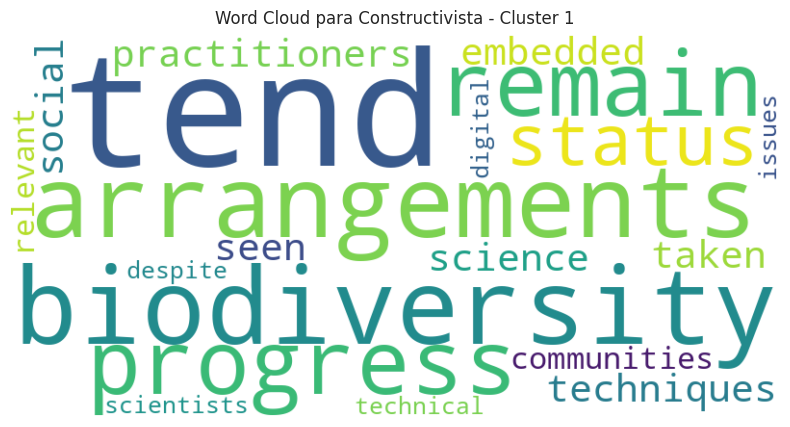

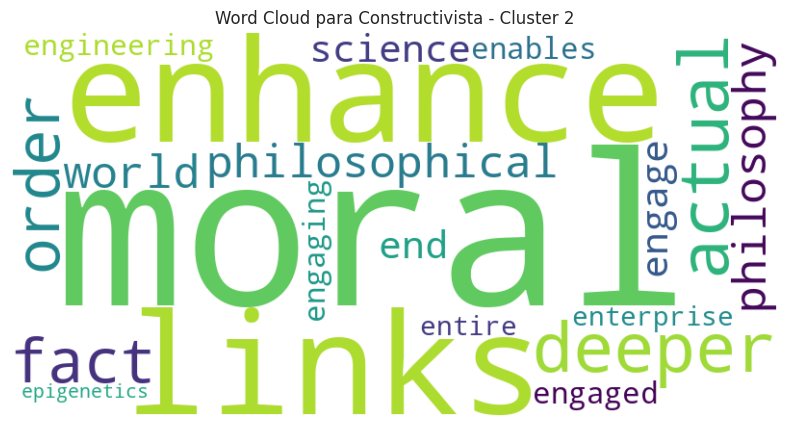

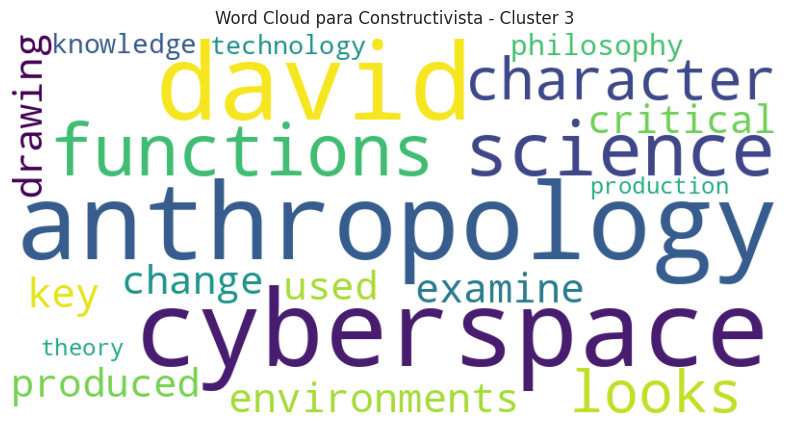

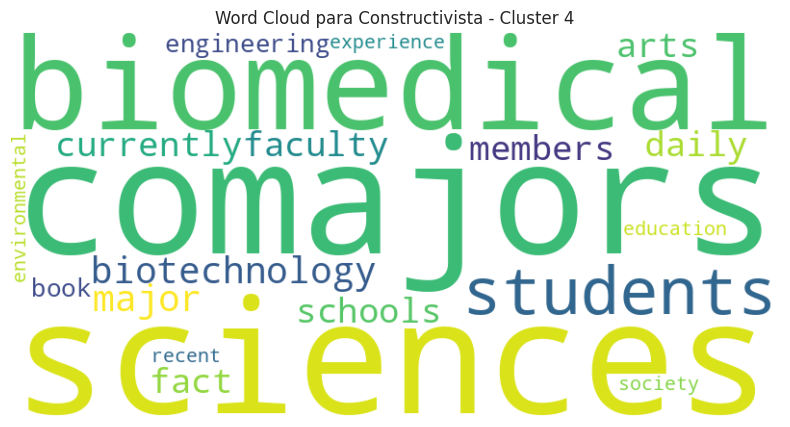

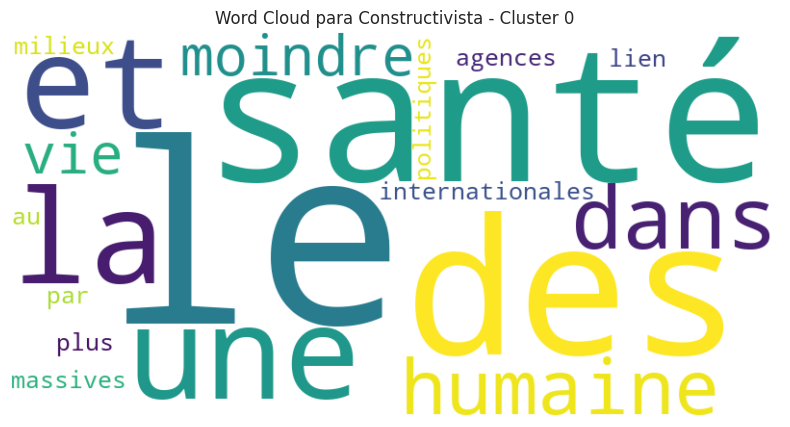


 Analizando subclusters dentro de Pragmatista


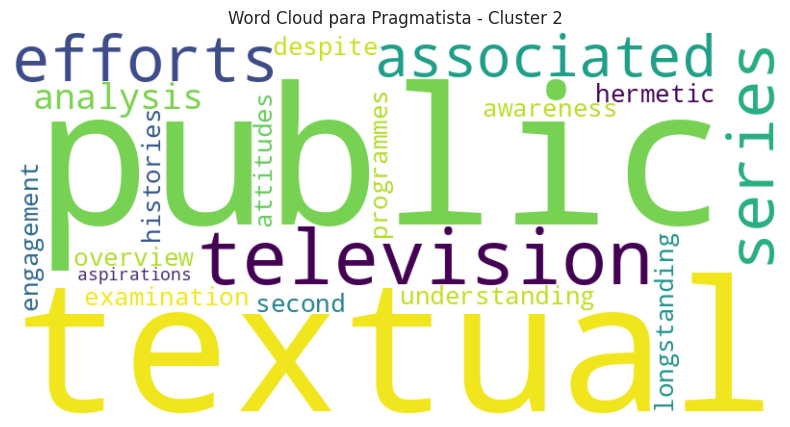

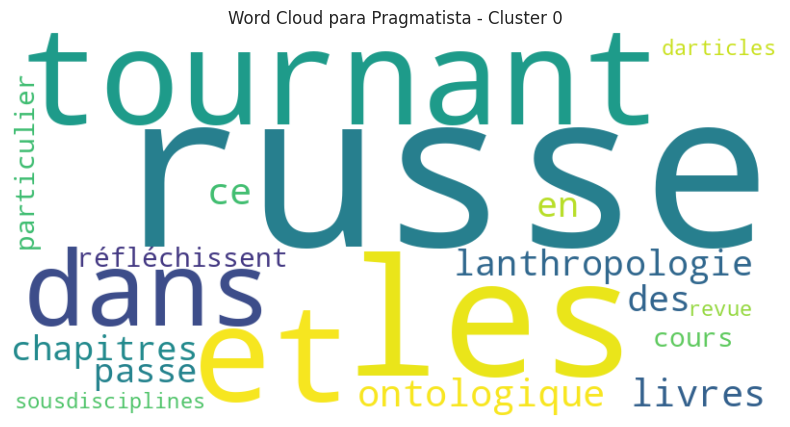

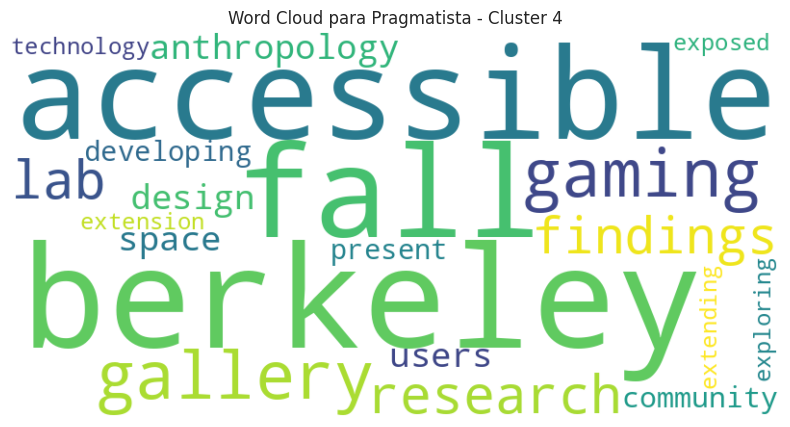

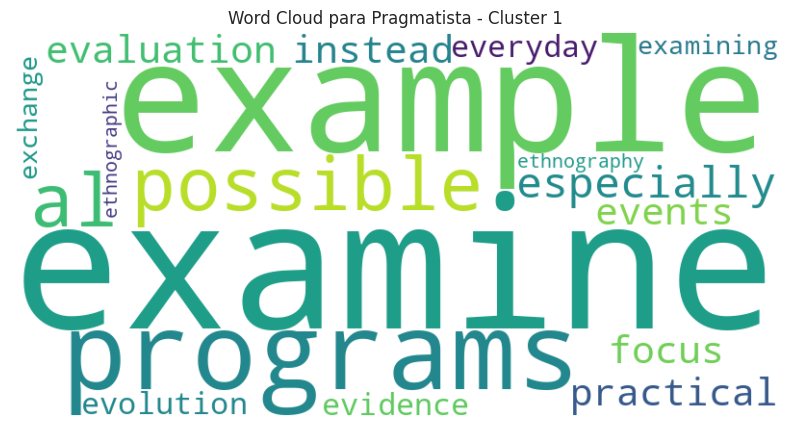

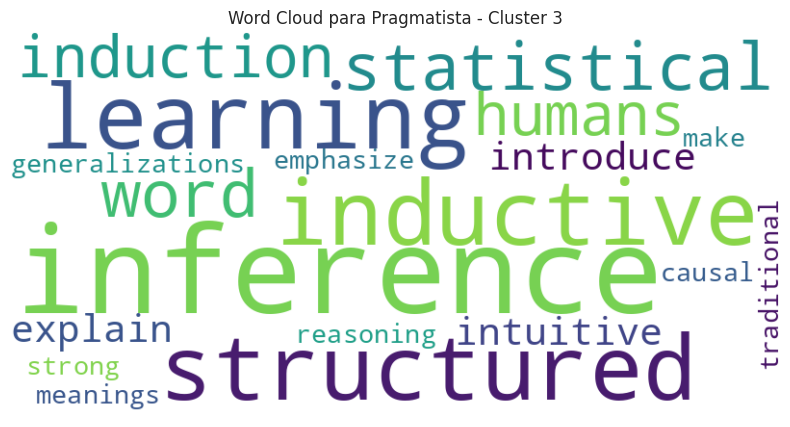


 Analizando subclusters dentro de Realista


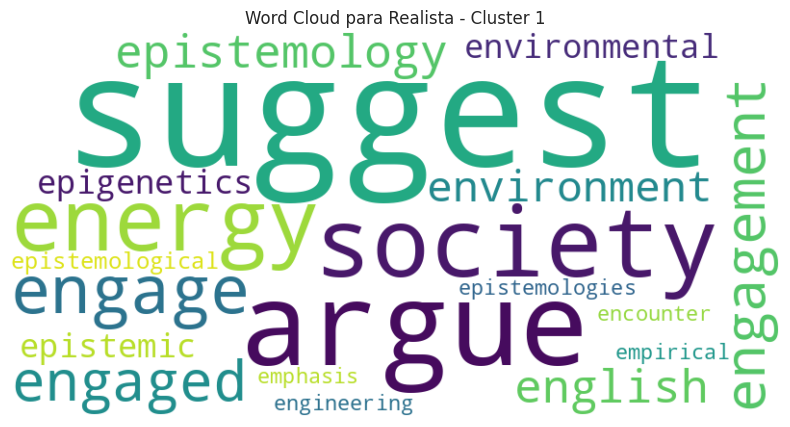

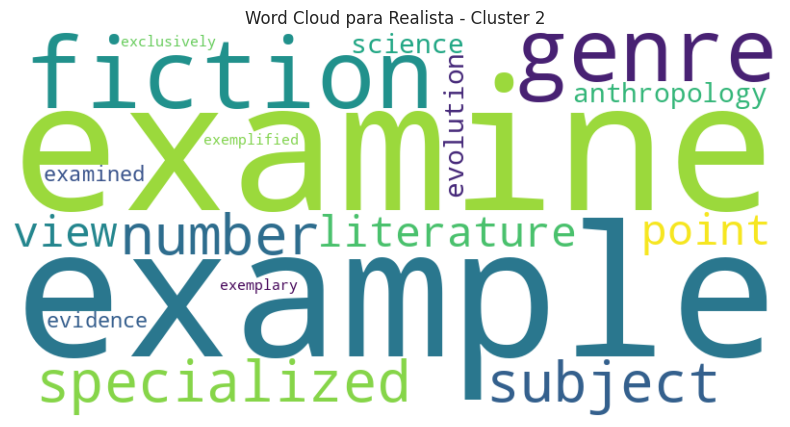

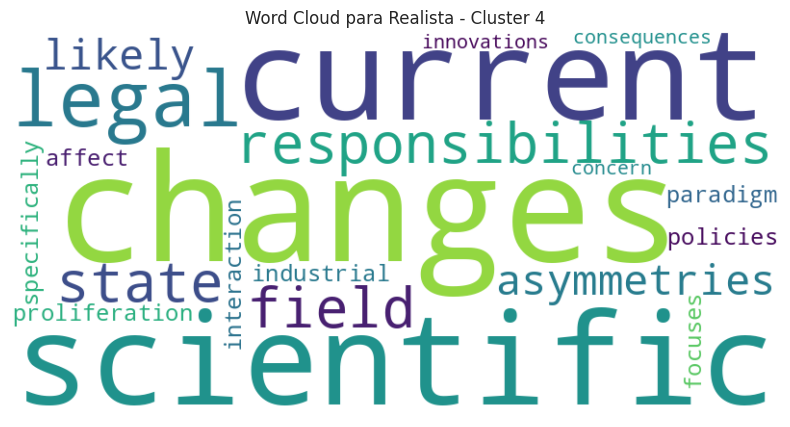

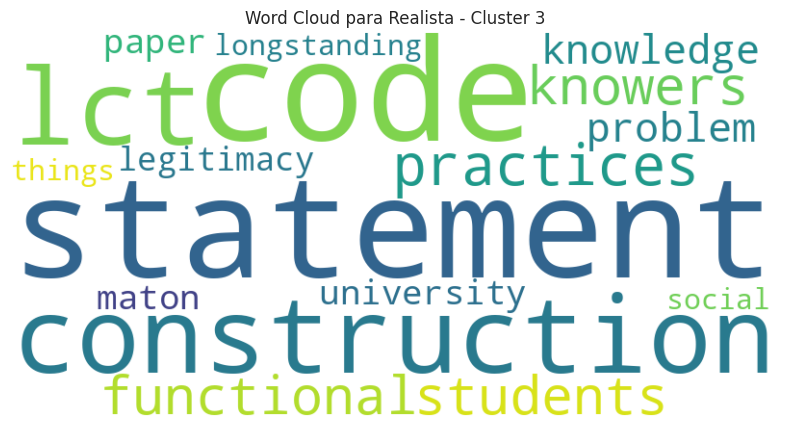

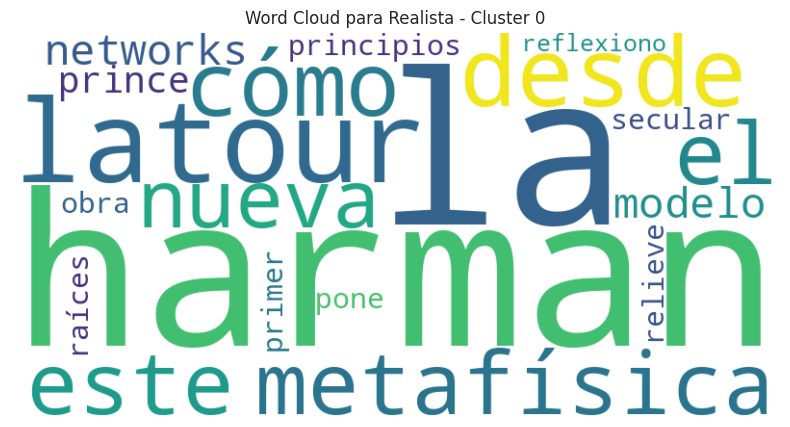


 Analizando subclusters dentro de Relativista


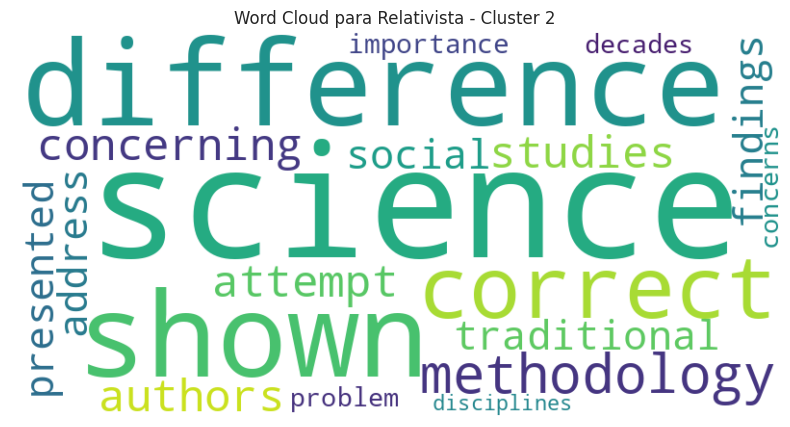

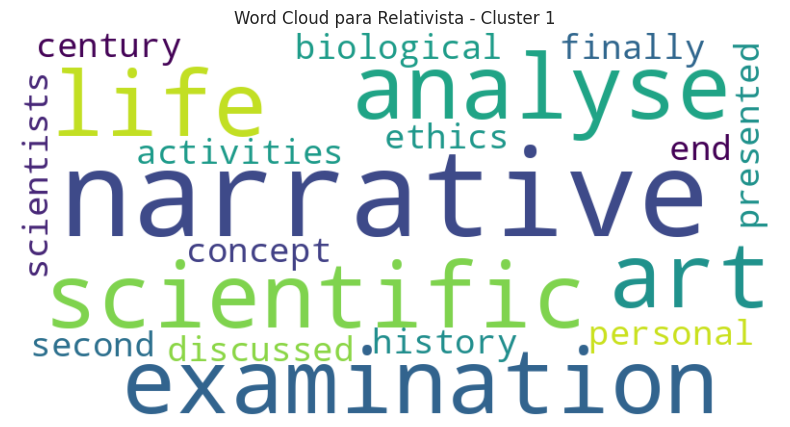

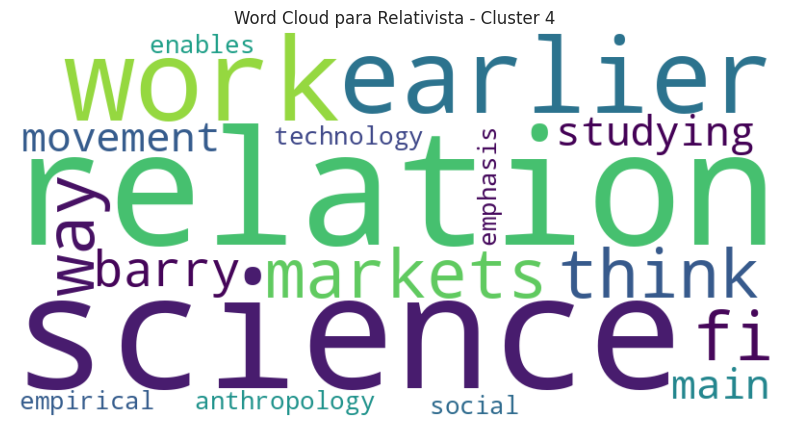

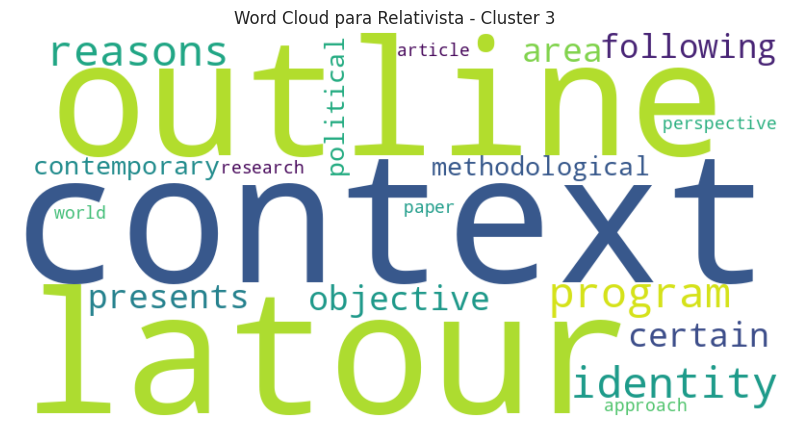

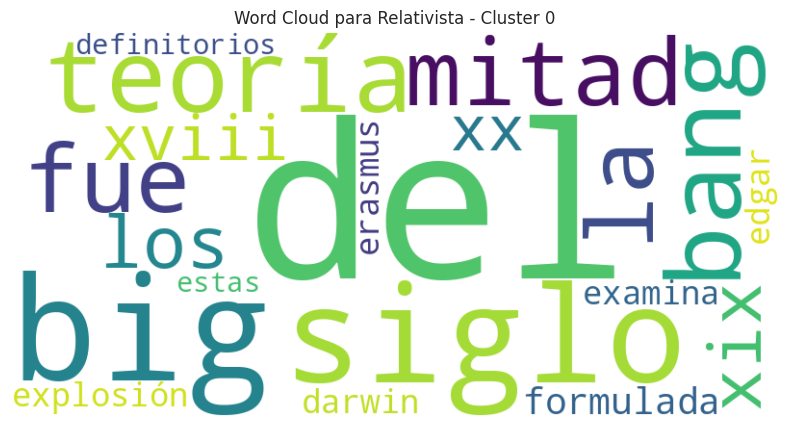

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#  Analizar palabras clave dentro de cada cluster
def get_top_keywords(texts, n_terms=10):
    vectorizer = TfidfVectorizer(max_features=1000, stop_words="english")
    X = vectorizer.fit_transform(texts)
    feature_array = np.array(vectorizer.get_feature_names_out())
    tfidf_sorting = np.argsort(X.toarray()).flatten()[::-1]

    top_n = feature_array[tfidf_sorting][:n_terms]
    return top_n

# Generar nubes de palabras para cada cluster en cada categoría
categories = ["Constructivista", "Pragmatista", "Realista", "Relativista"]
for category in categories:
    print(f"\n Analizando subclusters dentro de {category}")

    df_subset = df_classified[df_classified["Classification"] == category]

    for cluster in df_subset["Cluster"].unique():
        cluster_texts = df_subset[df_subset["Cluster"] == cluster]["cleaned_abstract"]
        keywords = get_top_keywords(cluster_texts, n_terms=20)

        #  Crear Word Cloud
        wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(keywords))

        #  Visualizar Word Cloud
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.title(f"Word Cloud para {category} - Cluster {cluster}")
        plt.show()


#### Etiquetar Clusters de acuerdo a las bolsas de palabras

In [ ]:
import pandas as pd

# Cargar el dataset previamente generado con los clusters internos
input_path = "/content/drive/My Drive/classified_abstracts_with_internal_clusters.csv"
df_combined_clusters = pd.read_csv(input_path)

# Definir las etiquetas manualmente para cada cluster dentro de cada categoría
cluster_labels = {
    "Constructivista": {
        0: "Globalización y Políticas de Salud en la Ciencia Constructivista",
        1: "Construcción del Conocimiento en Ciencia y Medio Ambiente",
        2: "Construcción de la Moral y Ética en la Ciencia",
        3: "Construcción del Conocimiento Digital y Antropológico",
        4: "Educación y Construcción del Conocimiento en Biotecnología",
    },
    "Pragmatista": {
        0: "El Giro Ruso y su Impacto en la Filosofía Pragmatista",
        1: "Métodos de Evaluación y Evidencia en el Pragmatismo",
        2: "Medios de Comunicación y Difusión del Conocimiento Pragmatista",
        3: "Métodos de Inferencia y Aprendizaje en el Pragmatismo",
        4: "Accesibilidad y Tecnología en la Construcción del Conocimiento Pragmatista",
    },
    "Realista": {
        0: "Realismo Metafísico y Filosofía Contemporánea",
        1: "Epistemología Realista y Sociedad",
        2: "Realismo en Literatura y Ciencia Ficción",
        3: "Realismo y Construcción del Conocimiento Académico",
        4: "Realismo Científico y Políticas Públicas",
    },
    "Relativista": {
        0: "Historia del Conocimiento y el Relativismo Temporal",
        1: "Relativismo en la Narrativa Científica y Artística",
        2: "Diversidad Metodológica y Relativismo en los Estudios Sociales",
        3: "Relativismo Político y Construcción del Conocimiento",
        4: "Relativismo Económico y Ciencia Social",
    }
}

# Asignar las etiquetas basadas en la clasificación y el cluster
def assign_labels(row):
    category = row["Classification"]
    cluster = row["Cluster"]
    return cluster_labels.get(category, {}).get(cluster, "Sin etiqueta")

df_combined_clusters["Cluster_Label"] = df_combined_clusters.apply(assign_labels, axis=1)

# Guardar el dataset final con las etiquetas
output_path = "/content/drive/My Drive/classified_abstracts_with_labeled_clusters.csv"
df_combined_clusters.to_csv(output_path, index=False)

print(f"\n✅ Clusters etiquetados correctamente. Archivo guardado en: {output_path}")



✅ Clusters etiquetados correctamente. Archivo guardado en: /content/drive/My Drive/classified_abstracts_with_labeled_clusters.csv


#### Clasificación Cuantiativo y Cualitativo


In [ ]:

!pip install --upgrade --force-reinstall torch transformers -q

import torch
from transformers import pipeline
import pandas as pd
from google.colab import drive


drive.mount('/content/drive')

input_path = "/content/drive/My Drive/classified_abstracts_with_labeled_clusters.csv"

# Cargar el dataset
df = pd.read_csv(input_path)
print(f"✅ Dataset cargado correctamente con {df.shape[0]} registros.")


# Usar GPU si está disponible
device = 0 if torch.cuda.is_available() else -1

# Cargar el modelo DeBERTa
classifier = pipeline("zero-shot-classification", model="microsoft/deberta-v3-large", device=device)

# Definir categorías descriptivas para mejorar la clasificación
labels = [
    "Este estudio utiliza métodos estadísticos, mediciones numéricas o análisis de datos cuantificables.", #Cuantitativo
    "Este estudio se basa en entrevistas, observaciones descriptivas o análisis de contenido textual y fenómenos sociales." #Cualitativo
]


def classify_research_type(abstract):
    """Clasifica si un artículo es Cuantitativo o Cualitativo usando DeBERTa."""
    if not isinstance(abstract, str) or abstract.strip() == "":
        return "Desconocido"

    try:
        result = classifier(abstract[:512], labels)
        label = result["labels"][0]  # Tomar la mejor categoría

        # Asignar categorías según la frase detectada
        if "métodos estadísticos" in label or "mediciones numéricas" in label:
            return "Cuantitativo"
        elif "entrevistas" in label or "observaciones descriptivas" in label:
            return "Cualitativo"
        else:
            return "Desconocido"
    except Exception as e:
        print(f"⚠ Error al clasificar un abstract: {e}")
        return "Error"

# Aplicar clasificación sobre la columna `cleaned_abstract`
df["Research_Type"] = df["cleaned_abstract"].apply(classify_research_type)


output_path = "/content/drive/My Drive/classified_abstracts_with_research_type_deberta.csv"
df.to_csv(output_path, index=False)

print(f"\n✅ Clasificación con DeBERTa completada. Archivo guardado en: {output_path}")


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datasets 3.2.0 requires fsspec[http]<=2024.9.0,>=2023.1.0, but you have fsspec 2025.2.0 which is incompatible.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2025.2.0 which is incompatible.
thinc 8.2.5 requires numpy<2.0.0,>=1.19.0; python_version >= "3.9", but you have numpy 2.2.2 which is incompatible.
torchaudio 2.5.1+cu124 requires torch==2.5.1, but you have torch 2.6.0 which is incompatible.
pytensor 2.26.4 requires numpy<2,>=1.17.0, but you have numpy 2.2.2 which is incompatible.
torchvision 0.20.1+cu124 requires torch==2.5.1, but you have torch 2.6.0 which is incompatible.
numba 0.61.0 requires numpy<2.2,>=1.24, but you have numpy 2.2.2 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.2 which is incompatible.
langchain 0.3.17 requires numpy<2,>=1.22.4;

config.json:   0%|          | 0.00/580 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/874M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/874M [00:00<?, ?B/s]

Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-large and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/convert_slow_tokenizer.py:561: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(
Device set to use cuda:0
Failed to determine 'entailment' label id from the label2id mapping in the model config. Setting to -1. Define a descriptive label2id mapping in the model config to ensure correct outputs.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.



✅ Clasificación con DeBERTa completada. Archivo guardado en: /content/drive/My Drive/classified_abstracts_with_research_type_deberta.csv


#### Autores

In [1]:

!pip install --upgrade --force-reinstall spacy spacy-transformers -q
!python -m spacy download en_core_web_trf

import spacy
import pandas as pd
from google.colab import drive


input_path = "/content/drive/My Drive/classified_abstracts_with_research_type_deberta.csv"

# Cargar el dataset
df = pd.read_csv(input_path)
print(f"✅ Dataset cargado correctamente con {df.shape[0]} registros.")



# Cargar el modelo de spaCy
nlp = spacy.load("en_core_web_trf")


def extract_authors(text):
    """Extrae nombres propios (autores) desde el abstract usando spaCy."""
    if not isinstance(text, str) or text.strip() == "":
        return "No encontrado"

    doc = nlp(text)
    authors = [ent.text for ent in doc.ents if ent.label_ == "PERSON"]

    return ", ".join(authors) if authors else "No encontrado"

# Aplicar extracción de autores sobre `Abstract` original
df["Extracted_Authors"] = df["Abstract"].apply(extract_authors)


output_path = "/content/drive/My Drive/classified_abstracts_with_authors.csv"
df.to_csv(output_path, index=False)

print(f"\n✅ Extracción de autores completada. Archivo guardado en: {output_path}")


ERROR: Operation cancelled by user
^C
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 457.4/457.4 MB 3.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_trf')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
✅ Dataset cargado correctamente con 6186 registros.

✅ Extracción de autores completada. Archivo guardado en: /content/drive/My Drive/classified_abstracts_with_authors.csv
